no outliers:69
           SalePrice   LotArea
SalePrice   1.000000  0.263843
LotArea     0.263843  1.000000


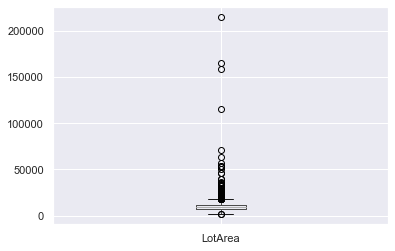

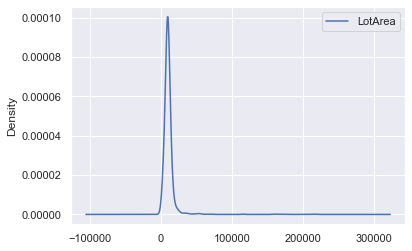

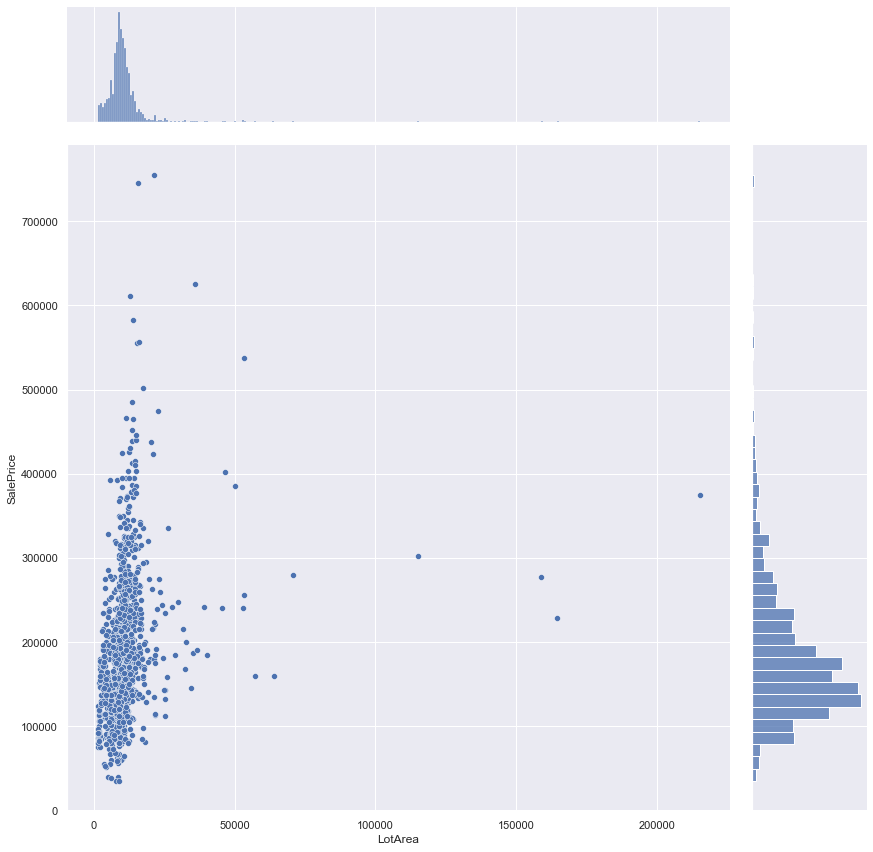

In [16]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()
saleprice = pd.DataFrame(traindata['SalePrice'])

traindata = pd.read_csv('train.csv')
lotarea = pd.DataFrame(traindata['LotArea'])
b_plot = (lotarea.boxplot(column = ['LotArea']))
b_plot.plot()
kde_plot = lotarea.plot.kde()
def find_outliers_IQR(df):

   q1=df.quantile(0.25)
   q3=df.quantile(0.75)

   IQR=q3-q1

   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

   return outliers

outliers = find_outliers_IQR(traindata['LotArea'])
print("no outliers:" + str(len(outliers)))
jointdf = pd.concat([saleprice,lotarea],axis = 1).reindex(saleprice.index)
sb.jointplot(data = jointdf, x = "LotArea", y = "SalePrice", height = 12)
print(jointdf.corr())

no outliers:31
           SalePrice  GrLivArea
SalePrice   1.000000   0.708624
GrLivArea   0.708624   1.000000


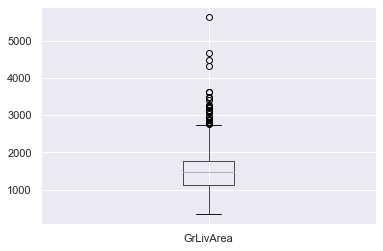

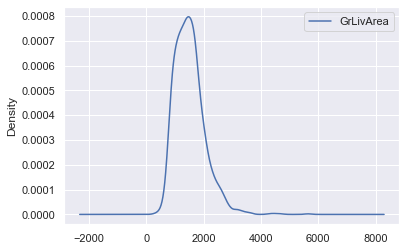

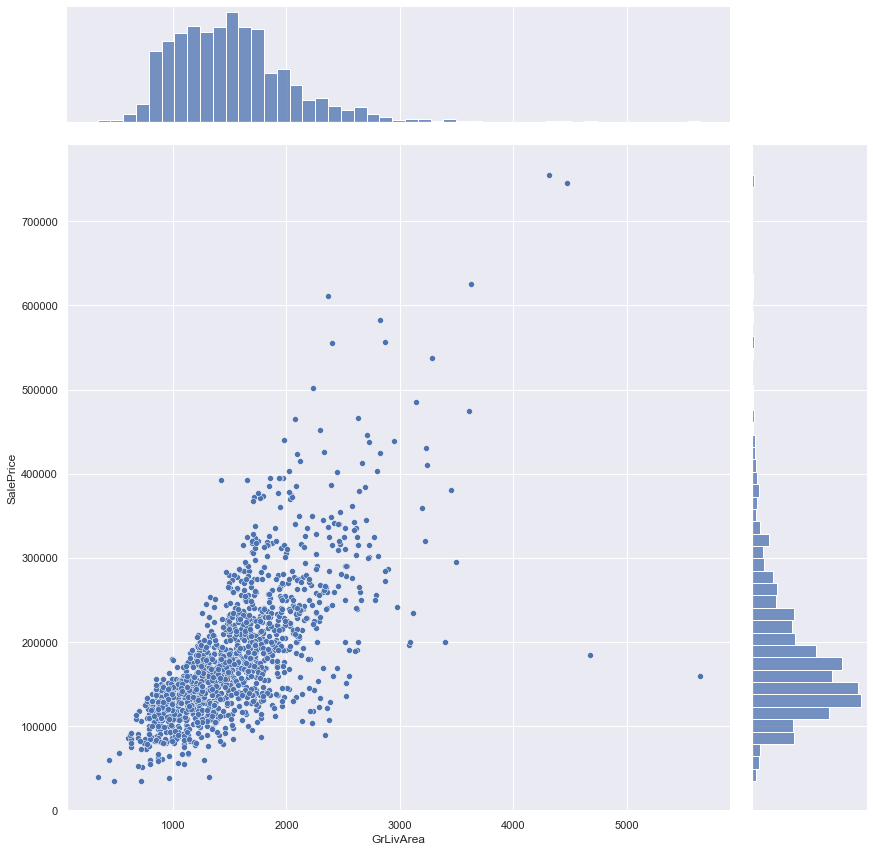

In [18]:
grlivarea = pd.DataFrame(traindata['GrLivArea'])
b_plot = grlivarea.boxplot(column='GrLivArea')
b_plot.plot()
kde_plot = grlivarea.plot.kde()
outliers = find_outliers_IQR(traindata['GrLivArea'])
print("no outliers:" + str(len(outliers)))
jointdf = pd.concat([saleprice,grlivarea],axis = 1).reindex(saleprice.index)
sb.jointplot(data = jointdf, x = "GrLivArea", y = "SalePrice", height = 12)
print(jointdf.corr())

no outliers:61
             SalePrice  TotalBsmtSF
SalePrice     1.000000     0.613581
TotalBsmtSF   0.613581     1.000000


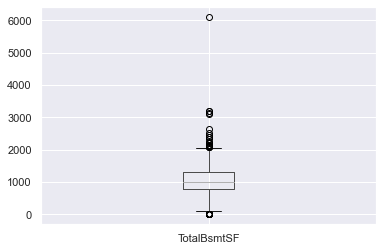

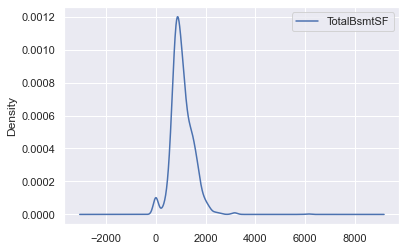

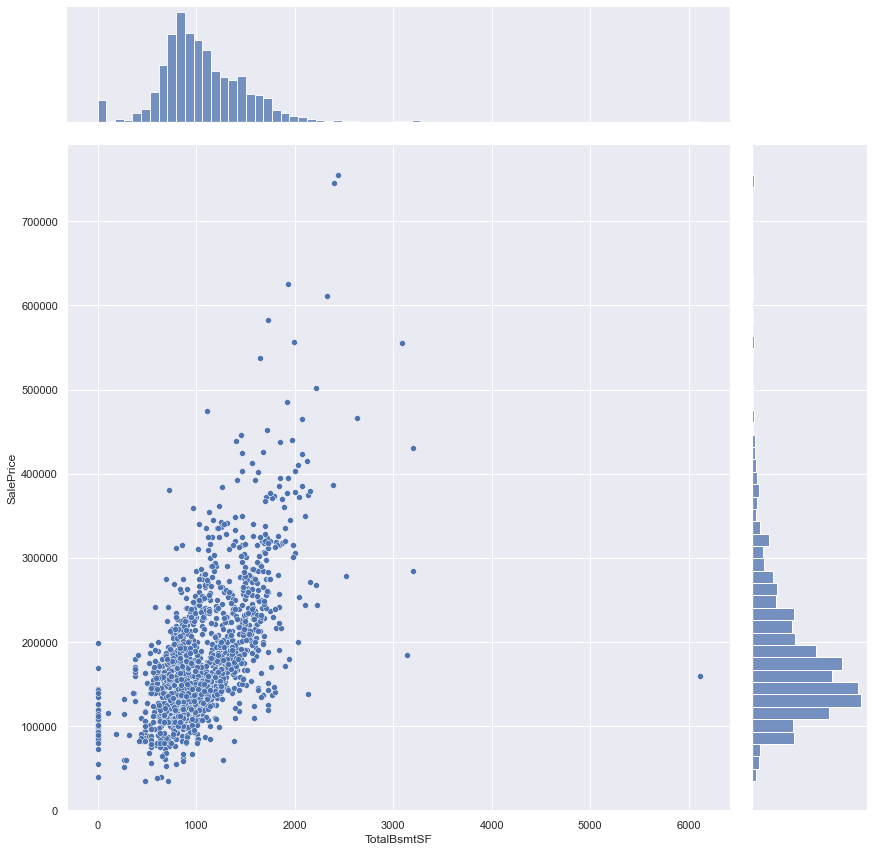

In [19]:
bsmtsf = pd.DataFrame(traindata['TotalBsmtSF'])
b_plot = bsmtsf.boxplot(column='TotalBsmtSF')
b_plot.plot()
kde_plot = bsmtsf.plot.kde()
outliers = find_outliers_IQR(traindata['TotalBsmtSF'])
print("no outliers:" + str(len(outliers)))
jointdf = pd.concat([saleprice,bsmtsf],axis = 1).reindex(saleprice.index)
sb.jointplot(data = jointdf, x = "TotalBsmtSF", y = "SalePrice", height = 12)
print(jointdf.corr())

no outliers:21
            SalePrice  GarageArea
SalePrice    1.000000    0.623431
GarageArea   0.623431    1.000000


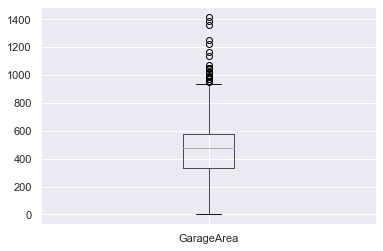

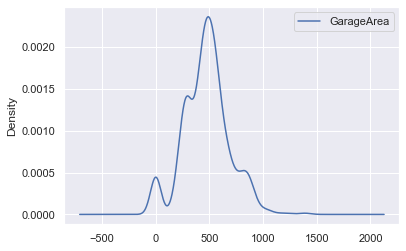

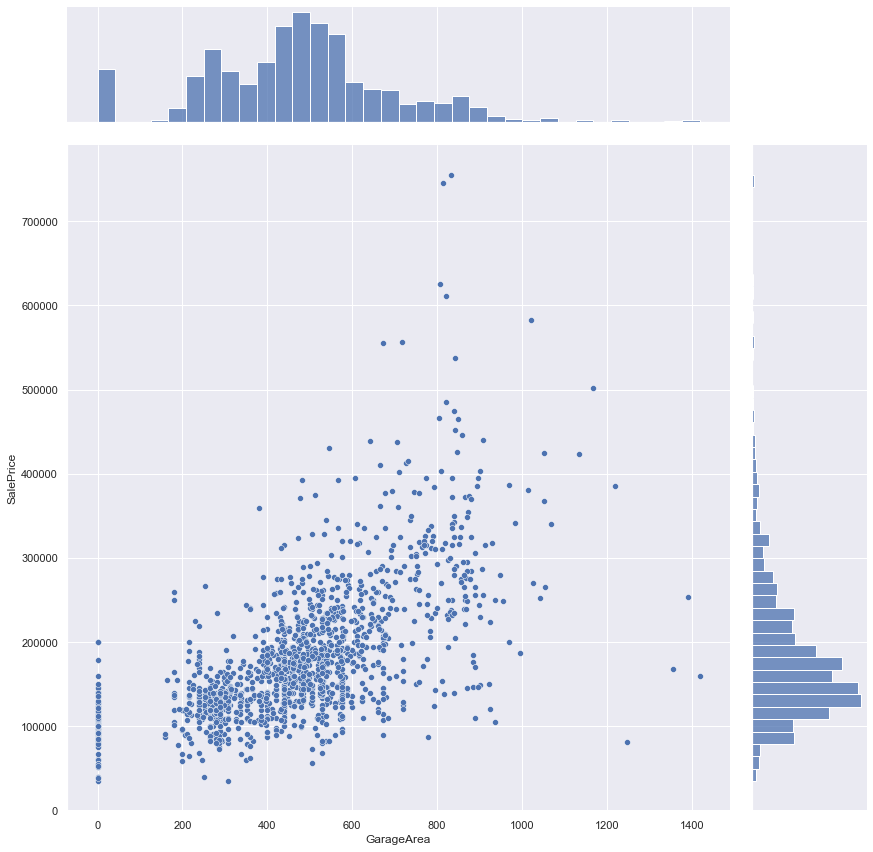

In [20]:
garea = pd.DataFrame(traindata['GarageArea'])
b_plot = garea.boxplot(column='GarageArea')
b_plot.plot()
kde_plot = garea.plot.kde()
outliers = find_outliers_IQR(traindata['GarageArea'])
print("no outliers:" + str(len(outliers)))
jointdf = pd.concat([saleprice,garea],axis = 1).reindex(saleprice.index)
sb.jointplot(data = jointdf, x = "GarageArea", y = "SalePrice", height = 12)
print(jointdf.corr())

In [93]:
traindata = pd.read_csv('train.csv')
traindata[['LotArea','SalePrice']].skew()



LotArea      12.207688
SalePrice     1.882876
dtype: float64

In [90]:
traindata = pd.read_csv('train.csv')
traindata[['GrLivArea','SalePrice']].skew()


GrLivArea    1.366560
SalePrice    1.882876
dtype: float64

In [91]:
traindata = pd.read_csv('train.csv')
traindata[['TotalBsmtSF','SalePrice']].skew()


TotalBsmtSF    1.524255
SalePrice      1.882876
dtype: float64

In [92]:
traindata = pd.read_csv('train.csv')
traindata[['GarageArea','SalePrice']].skew()

GarageArea    0.179981
SalePrice     1.882876
dtype: float64

In [22]:
print('1(a) Lot Area has the most number of outliers at 69  ')
print('1(b) Lot Area is the most skewed from a normal dist. It has a positive skew')
print('1(c) Garage Area and Grlivarea seems to have the strongest linear r/ship with sale price based on the joint plot. As such they should be the most useful')

1(a) Lot Area has the most number of outliers at 69  
1(b) Garage Area is the most skewed from a normal dist. It has a negative skew
1(c) Garage Area and Grlivarea seems to have the strongest linear r/ship with sale price based on the joint plot. As such they should be the most useful


In [26]:
print('Problem 2')

m = len(pd.unique(traindata['MSSubClass']))
print('no of unique values(MSSubClass): ', m)

n = len(pd.unique(traindata['Neighborhood']))
print('no of unique values(Neighborhood): ', n)
bldg = pd.DataFrame(traindata['BldgType'])
b = len(pd.unique(traindata['BldgType']))
print('no of unique values(BldgType): ', b)

q = len(pd.unique(traindata['OverallQual']))
print('no of unique values(OverallQual): ', q)

Problem 2
no of unique values(MSSubClass):  15
no of unique values(Neighborhood):  25
no of unique values(BldgType):  5
no of unique values(OverallQual):  10


In [38]:
print('MSSubClass')
print(traindata.MSSubClass.value_counts())
print('Neighborhood')
print(traindata.Neighborhood.value_counts())
print('BldgType')
print(traindata.BldgType.value_counts())
print('OverallQual')
print(traindata.OverallQual.value_counts())

MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64
Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


           SalePrice
SalePrice        1.0


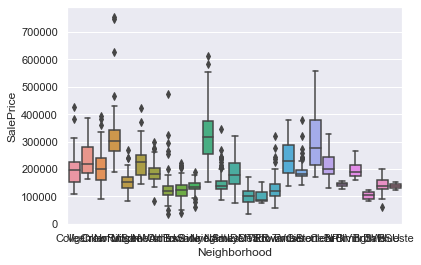

In [74]:
neighbor = pd.DataFrame(traindata['Neighborhood'])
jointdf = pd.concat([saleprice,neighbor],axis = 1).reindex(saleprice.index)
sb.boxplot(data = jointdf, x = "Neighborhood", y = "SalePrice")
print(jointdf.corr())

            SalePrice  MSSubClass
SalePrice    1.000000   -0.084284
MSSubClass  -0.084284    1.000000


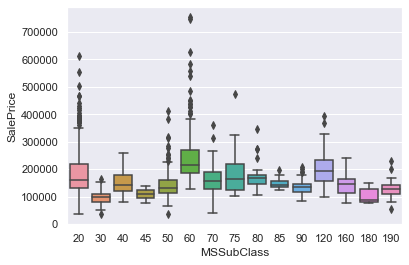

In [80]:
mssub = pd.DataFrame(traindata['MSSubClass'])
jointdf = pd.concat([saleprice,mssub],axis = 1).reindex(saleprice.index)
sb.boxplot(data = jointdf, x = "MSSubClass", y = "SalePrice")
print(jointdf.corr())

             SalePrice  OverallQual
SalePrice     1.000000     0.790982
OverallQual   0.790982     1.000000


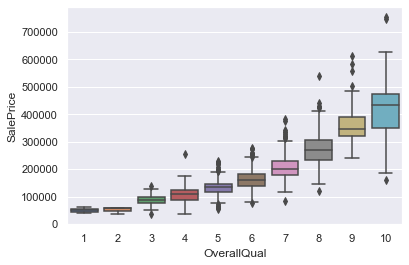

In [72]:
qual = pd.DataFrame(traindata['OverallQual'])
jointdf = pd.concat([saleprice,qual],axis = 1).reindex(saleprice.index)
sb.boxplot(data = jointdf, x = "OverallQual", y = "SalePrice")
print(jointdf.corr())

           SalePrice
SalePrice        1.0


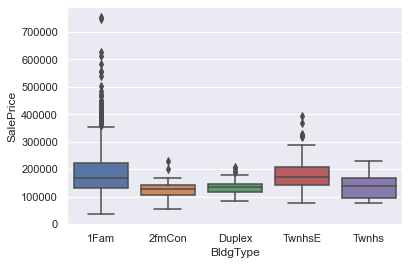

In [71]:
bldg = pd.DataFrame(traindata['BldgType'])
jointdf = pd.concat([saleprice,bldg],axis = 1).reindex(saleprice.index)
sb.boxplot(data = jointdf, x = "BldgType", y = "SalePrice")
print(jointdf.corr())

In [81]:
print('2a Highest Number of levels: Neighborhood. 1Fam has the highest number of houses')
print('2b I would use overall quality and neighborhoods to predict sale price. Overall Quality and Sale price appear to have a relatively positive linear relationship where price increases with quality')
print('Similarly, neighbourhood prices change depending on neighbourhood maybe because of facilities in different neighbourhoods.')

2a Highest Number of levels: Neighborhood. 1Fam has the highest number of houses
2b I would use overall quality and building type to predict sale price. Overall Quality and Sale price appear to have a relatively positive linear relationship where price increases with quality
Similarly, Building types tend to stick in a certain price range with the exception of 1Fam which spans a large range of sale prices


           SalePrice
SalePrice        1.0


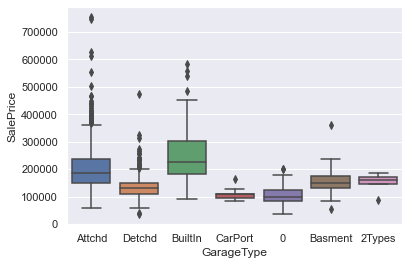

In [69]:
newtraindata = traindata.fillna(value='0', axis='index')
gtype = pd.DataFrame(newtraindata['GarageType'])
jointdf = pd.concat([saleprice,gtype],axis = 1).reindex(saleprice.index)
sb.boxplot(data = jointdf, x = "GarageType", y = "SalePrice")
print(jointdf.corr())

In [82]:
print('3a: houses with no garage do tend to have lower sale prices. houses with no garage have a median around 10k which is much lower than houses with garages')

3a: houses with no garage do tend to have lower sale prices. houses with no garage have a median around 10k which is much lower than houses with garages
